In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target
names = iris.target_names

In [5]:
print(x.shape, y.shape)

(150, 4) (150,)


In [6]:
names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(x, columns=iris.feature_names)
df['species'] = iris.target
df['sepcies'] = df['species'].replace(to_replace=[0,1,2], value=['setosa', 'versicolor', 'virginica'])

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,sepcies
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   sepcies            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
sepcies              0
dtype: int64

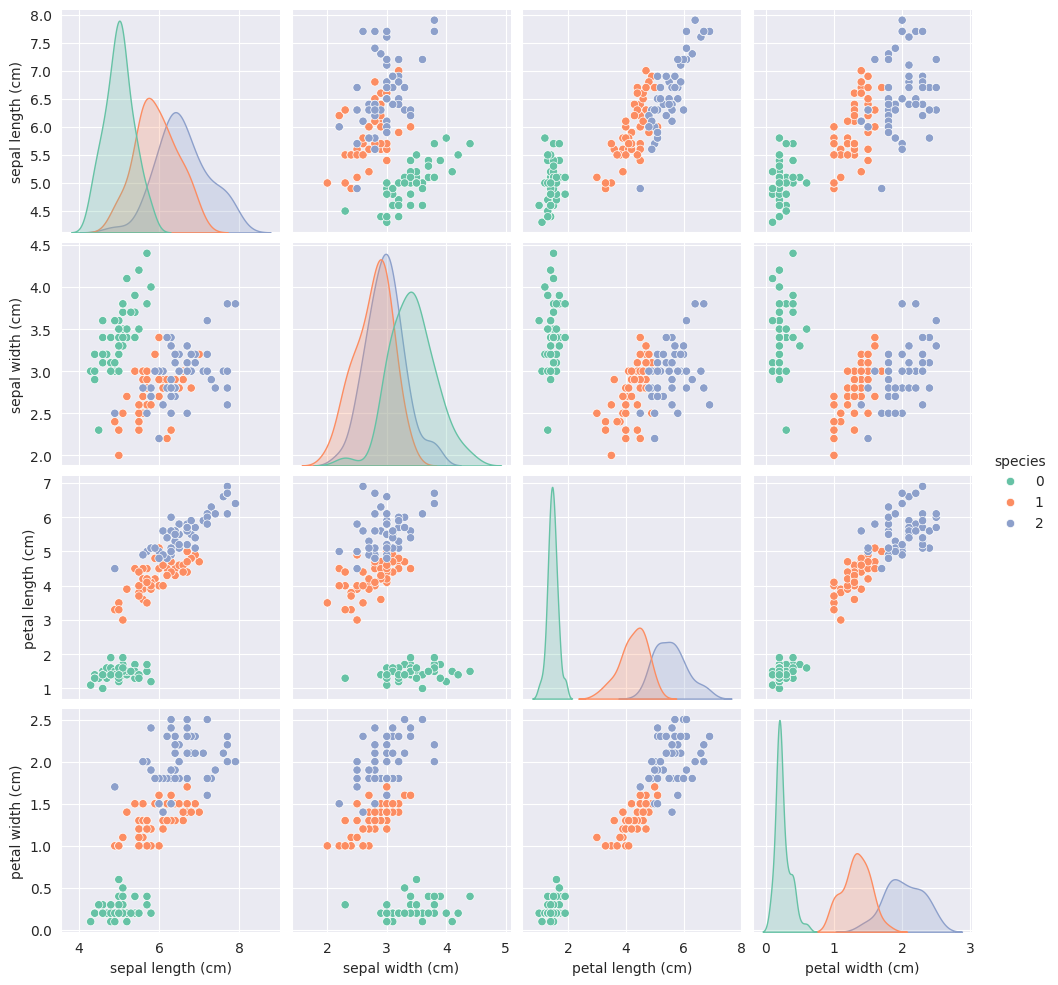

In [11]:
sns.pairplot(data = df, hue='species', palette='Set2')

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=0)
svc.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
pred = svc.predict(x_test)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, pred)

1.0

In [16]:
confusion_matrix(y_test, pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [17]:
rbf_svc = SVC(kernel='rbf', random_state=42)
rbf_svc.fit(x_train, y_train)
rbf_pred = rbf_svc.predict(x_test)

In [18]:
accuracy_score(y_test, rbf_pred)

1.0

In [19]:
confusion_matrix(y_test, rbf_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])